<a href="https://colab.research.google.com/github/adarsh-saji/Deep_learning_projects/blob/main/Object_Localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.optimizers import Adam,SGD

In [ ]:
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanIoU

In [ ]:
from matplotlib.patches import Rectangle
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
vgg = VGG16(input_shape=[100,100,3], include_top= False, weights = 'imagenet')

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
x = Flatten()(vgg.output)
x = Dense(4, activation = 'sigmoid')(x)
model = Model(vgg.input, x)

In [ ]:
def image_generator(batch_size = 64):
  while True:
    for _ in range(50):
      X = np.zeros((batch_size,100, 100,3))
      Y = np.zeros((batch_size, 4))

      for i in range(batch_size):
        row0 = np.random.randint(90)
        col0 = np.random.randint(90)
        row1 = np.random.randint(row0,100)
        col1 = np.random.randint(col0,100)

        X[i, row0:row1, col0:col1, :] = 1
        Y[i,0] = row0/100
        Y[i,1] = col0/100
        Y[i,2] = (row1-row0)/100
        Y[i,3] = (col1-col0)/100

    yield X,Y

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = Adam(learning_rate= 0.001))

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [ ]:
model.fit_generator(
    image_generator(),
    steps_per_epoch=50,
    epochs= 5
)

Epoch 1/5


<ipython-input-19-9ca3a4e19fa6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


50/50 [==============================] - 14s 201ms/step - loss: 226.7711
Epoch 2/5
50/50 [==============================] - 9s 184ms/step - loss: 0.5206
Epoch 3/5
50/50 [==============================] - 11s 231ms/step - loss: 0.5104
Epoch 4/5
50/50 [==============================] - 9s 178ms/step - loss: 0.5024
Epoch 5/5
50/50 [==============================] - 10s 202ms/step - loss: 0.5071


In [ ]:
def make_prediction():
  x = np.zeros((100,100,3))
  row0 = np.random.randint(90)
  col0 = np.random.randint(90)
  row1 = np.random.randint(row0,100)
  col1 = np.random.randint(col0,100)

  x[row0:row1, col0:col1, :] = 1
  print(row0,col0,row1,col0)

  X = np.expand_dims(x, axis = 0)
  p= model.predict(X)[0]
  print("Predicted:", p)

  fig, ax =plt.subplots(1)
  ax.imshow(x)
  rect = Rectangle(
    (p[1] * 100, p[0] * 100),
    p[3] * 100, p[2] * 100,
    linewidth=2, edgecolor='r', facecolor='none'
)

  ax.add_patch(rect)
  plt.show()

3 21 44 21
1/1 [==============================] - 0s 17ms/step
Predicted: [0.03008236 0.20036387 0.40810546 0.42469397]


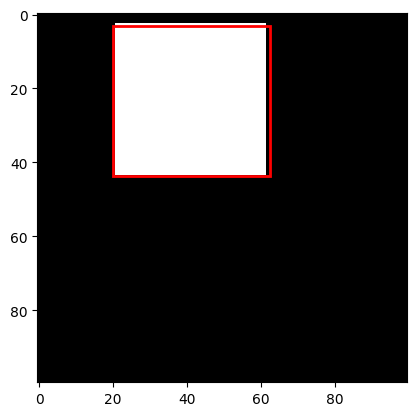

In [ ]:
make_prediction()